# CNN을 이용한 Cifar-10 학습

# 임베디드시스템 및 IoT로의 활용 2분반

# 32184074 컴퓨터공학과 정민준

# 2023/03/31

## 모델 학습

In [7]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images=train_images/255.0
test_images=test_images/255.0

model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.Conv2D(128, (3,3), activation='relu'))


model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])
history=model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 16s 8ms/step - loss: 1.6384 - accuracy: 0.3820 - val_loss: 1.3039 - val_accuracy: 0.5318
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1668 - accuracy: 0.5809 - val_loss: 1.0694 - val_accuracy: 0.6273
Epoch 3/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9494 - accuracy: 0.6634 - val_loss: 1.0247 - val_accuracy: 0.6590
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8126 - accuracy: 0.7156 - val_loss: 0.8597 - val_accuracy: 0.7026
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7125 - accuracy: 0.7500 - val_loss: 0.8634 - val_accuracy: 0.7034
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6344 - accuracy: 0.7793 - val_loss: 0.8145 - val_accuracy: 0.7274
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.5627 - accuracy: 0.8057 - val_loss: 0.8196 - val_ac

## 평가 및 시각화

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("Modified Model Accuracy: ",test_acc)

313/313 - 1s - loss: 0.8746 - accuracy: 0.7393 - 1s/epoch - 3ms/step
Modified Model Accuracy:  0.739300012588501


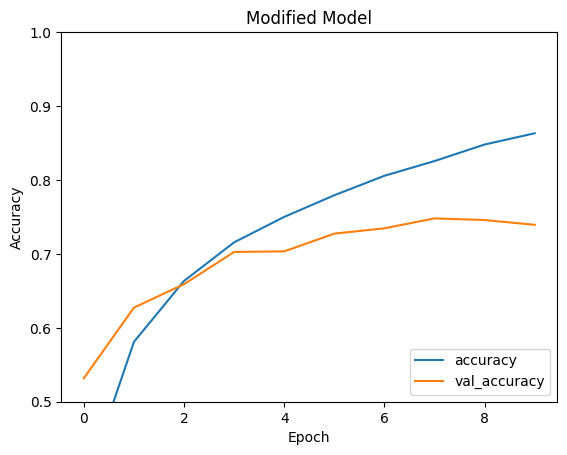

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title("Modified Model")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')